# NLP EDA

How do we quantify our text data?

- word frequency
- ngrams
- word cloud
- other common features of text data
- (maybe) sentiment analysis

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk
import nltk.sentiment
import re

In [26]:
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=14)
plt.style.use('seaborn-darkgrid')

https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [5]:
df = pd.read_csv('./spam_clean.csv')
print(df.shape)
df.head()

(5572, 2)


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text: str) -> list:
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (text.encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split() # tokenization
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

What are the most common words + phrases in the entire dataset, spam messages, and ham messages?

In [16]:
all_words = clean(' '.join(df.text))
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))

Text(0.5, 0, 'Number of occurances')

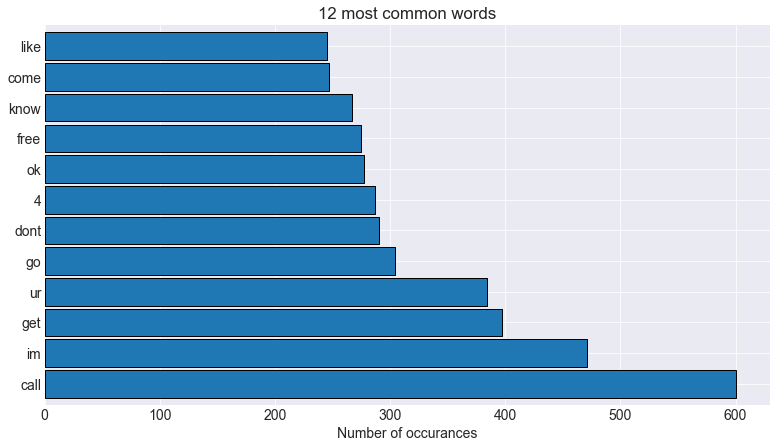

In [28]:
pd.Series(all_words).value_counts().head(12).plot.barh(width=.9, ec='black', title='12 most common words')
plt.xlabel('Number of occurances')

In [29]:
all_freq = pd.Series(all_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
ham_freq = pd.Series(ham_words).value_counts()

In [30]:
spam_freq

call                                                359
free                                                216
txt                                                 150
ur                                                  144
text                                                137
                                                   ... 
300603tcsbcm4235wc1n3xxcallcost150ppmmobilesvary      1
calls150ppm                                           1
error                                                 1
wwwtelediscountcouk                                   1
09061701444                                           1
Length: 2783, dtype: int64

In [31]:
ham_freq

im                  458
get                 314
go                  273
ok                  272
dont                268
                   ... 
offline               1
studentfinancial      1
sneham                1
mailed                1
dying                 1
Length: 6935, dtype: int64

In [34]:
word_counts = pd.concat([
    all_freq,
    ham_freq,
    spam_freq,
], axis=1)
word_counts = word_counts.fillna(0).astype(int)
word_counts.columns = ['all', 'ham', 'spam']
word_counts

,all,ham,spam
call,600,241,359
im,471,458,13
get,397,314,83
ur,384,240,144
go,304,273,31
...,...,...,...
nbme,1,1,0
headset,1,0,1
karnan,1,1,0
863,1,1,0


In [36]:
word_counts.spam.sort_values().tail(15)

new         69
service     72
tone        73
get         83
prize       94
reply      102
stop       113
claim      115
4          119
mobile     135
text       137
ur         144
txt        150
free       216
call       359
Name: spam, dtype: int64

In [37]:
word_counts.ham.sort_values().tail(15)

time    213
day     214
good    223
got     231
like    232
ill     240
ur      240
call    241
know    241
come    242
dont    268
ok      272
go      273
get     314
im      458
Name: ham, dtype: int64

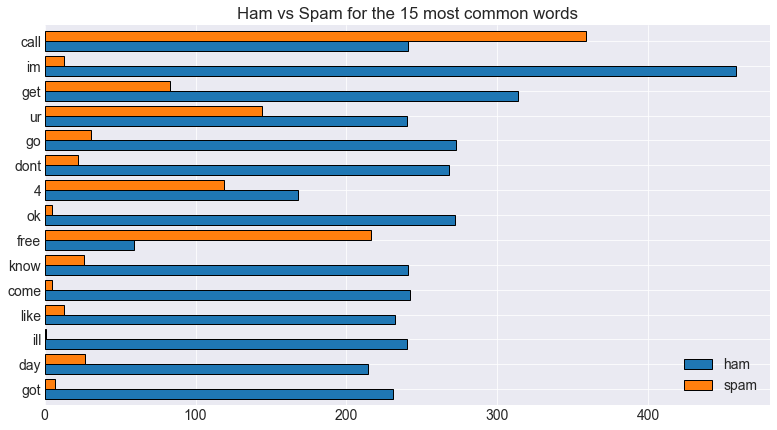

In [43]:
most_common_words = word_counts.sort_values(by='all').tail(15)
most_common_words.drop(columns='all').plot.barh(width=.8, ec='black', title='Ham vs Spam for the 15 most common words')

Let's find some representative messages:

In [52]:
print(df[df.text.str.lower().str.contains('free')].head(1).text[2])

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


In [57]:
print(df[df.text.str.lower().str.contains('call')].text[8])

WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.


What are the most common phrases?

**ngram**: a combination of n words at a time

**bigram**: 2 words at a time

In [60]:
list(nltk.bigrams('Curie is set to graduate in about 6 weeks.'.split()))

[('Curie', 'is'),
 ('is', 'set'),
 ('set', 'to'),
 ('to', 'graduate'),
 ('graduate', 'in'),
 ('in', 'about'),
 ('about', '6'),
 ('6', 'weeks.')]

In [61]:
list(nltk.ngrams('Curie is set to graduate in about 6 weeks.'.split(), 3))

[('Curie', 'is', 'set'),
 ('is', 'set', 'to'),
 ('set', 'to', 'graduate'),
 ('to', 'graduate', 'in'),
 ('graduate', 'in', 'about'),
 ('in', 'about', '6'),
 ('about', '6', 'weeks.')]

In [65]:
pd.Series(nltk.bigrams(all_words)).value_counts()

(please, call)       53
(call, later)        52
(ill, call)          48
(let, know)          42
(sorry, ill)         39
                     ..
(dark, liao)          1
(girl, ive)           1
(latest, sport)       1
(macedonia, dont)     1
(got, use)            1
Length: 37441, dtype: int64

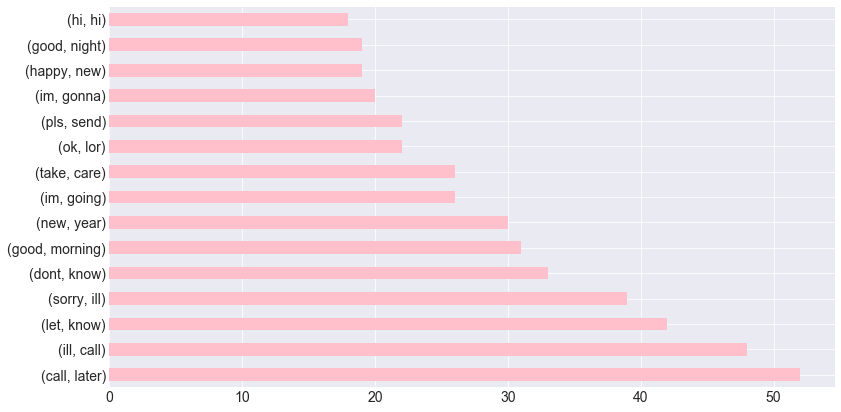

In [67]:
pd.Series(nltk.bigrams(ham_words)).value_counts().head(15).plot.barh(color='pink')

In [70]:
print(df[df.text.str.lower().str.contains('happy new')].text[764])

Wishing you and your family Merry \X\" mas and HAPPY NEW Year in advance.."


## Word Cloud

Putting a bunch of words in an image, the size of the word indicates how frequently the word appears.

```
python -m pip install wordcloud
```

(-0.5, 1199.5, 899.5, -0.5)

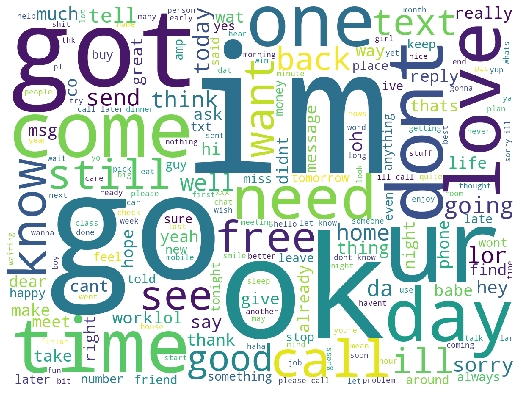

In [74]:
from wordcloud import WordCloud

text = ' '.join(all_words)
wc = WordCloud(background_color='white', width=1200, height=900)
img = wc.generate(text)

plt.imshow(img)
plt.axis('off')

## Other Common Features

- Domain Specific
- character count
- word count
- sentence count

In [77]:
df['ch_count'] = df.text.apply(len)

In [80]:
df['word_count'] = df.text.apply(clean).apply(len)

In [81]:
nltk.sent_tokenize('Curie is a great cohort! Today is Friday... it\'s almost the weekend!')

['Curie is a great cohort!', "Today is Friday... it's almost the weekend!"]

In [84]:
df['sentence_count'] = df.text.apply(nltk.sent_tokenize).apply(len)

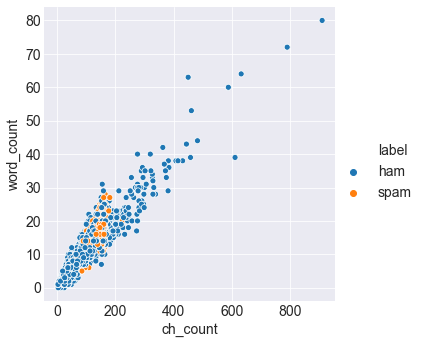

In [87]:
sns.relplot(data=df, y='word_count', x='ch_count', hue='label')

In [88]:
df.groupby('label').median()

,ch_count,word_count,sentence_count
label,,,
ham,52,6,1
spam,149,17,3


- unique word count
- punctuation count
- average word length
- average words per sentence
- lots of room for creativity here!

## Sentiment Analysis

- Is this text generally positive or generally negative?
- Statistical + knowledge based approach
- [Vader Sentiment Analyzer](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf): purpose built for social media
- afinn

In [89]:
sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [98]:
sia.polarity_scores('This food is not bad :-)')

{'neg': 0.223, 'neu': 0.454, 'pos': 0.323, 'compound': 0.2235}

In [101]:
sia.polarity_scores('That food is just okay')

{'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.2263}

In [95]:
df['sentiment'] = df.text.apply(lambda msg: sia.polarity_scores(msg)['compound'])

In [96]:
df.groupby('label').sentiment.mean()

label
ham     0.152262
spam    0.436018
Name: sentiment, dtype: float64

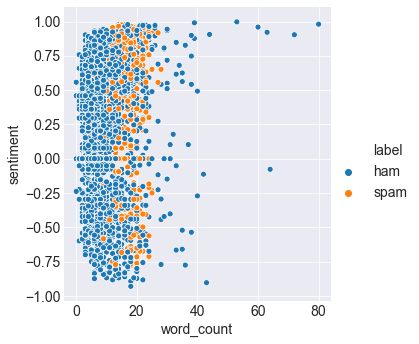

In [103]:
sns.relplot(data=df, x='word_count', y='sentiment', hue='label')

In [107]:
df['multisentence'] = df.sentence_count > 1

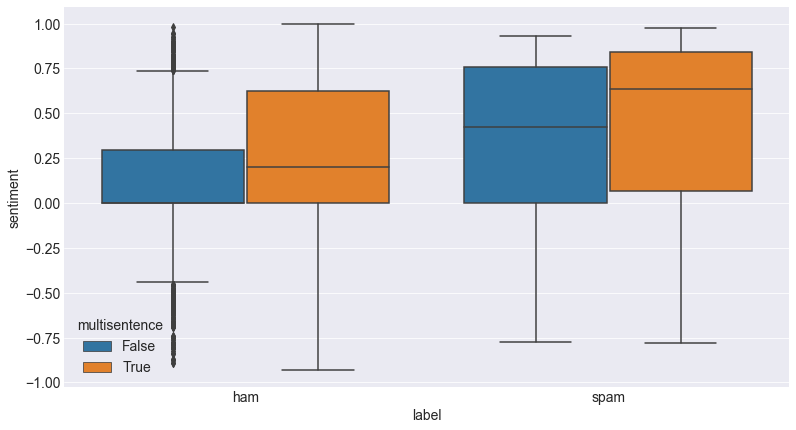

In [109]:
sns.boxplot(data=df, y='sentiment', x='label', hue='multisentence')

In [111]:
df.groupby(['label', 'multisentence']).sentiment.describe()

count      mean       std     min       25%     50%  \
label multisentence                                                         
ham   False          2651.0  0.095241  0.317105 -0.8935  0.000000  0.0000   
      True           2174.0  0.221794  0.458340 -0.9304  0.000000  0.2023   
spam  False           135.0  0.318739  0.486140 -0.7717  0.000000  0.4215   
      True            612.0  0.461888  0.458430 -0.7793  0.068675  0.6360   

                        75%     max  
label multisentence                  
ham   False          0.2960  0.9808  
      True           0.6239  0.9975  
spam  False          0.7579  0.9317  
      True           0.8439  0.9753

In [112]:
df

,label,text,ch_count,word_count,sentence_count,sentiment,multisentence
0,ham,"Go until jurong point, crazy.. Available only ...",111,16,2,0.6249,True
1,ham,Ok lar... Joking wif u oni...,29,5,2,0.4767,True
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,22,2,0.7964,True
3,ham,U dun say so early hor... U c already then say...,49,7,1,0.0000,False
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,8,1,-0.1027,False
...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,16,4,0.8805,True
5568,ham,Will Ì_ b going to esplanade fr home?,37,6,1,0.0000,False
5569,ham,"Pity, * was in mood for that. So...any other s...",57,4,2,-0.2960,True
5570,ham,The guy did some bitching but I acted like i'd...,125,14,1,0.8934,False
